In [1]:
import pandas as pd

messages = pd.read_csv('G:/OpenCV_Course/python_env/NLP_projs/news.csv')#, sep='\t', names=["label","title"], encoding='ISO-8859-1')
print("Dataset Columns:", messages.columns)

print(messages)


Dataset Columns: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0 

In [2]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
new_messages=[]

for i in range(len(messages)):
    message =str(messages['title'][i])
    review = re.sub('[^a-zA-Z]',' ', message )
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review =' '.join(review)
    new_messages.append(review)

print(new_messages)

['smell hillary fear', 'watch exact moment paul ryan committed political suicide trump rally video', 'kerry go paris gesture sympathy', 'bernie supporter twitter erupt anger dnc tried warn', 'battle new york primary matter', 'tehran usa', 'girl horrified watch boyfriend left facetime', 'britain schindler dy', 'fact check trump clinton commander chief forum', 'iran reportedly make new push uranium concession nuclear talk', 'three clinton iowa glimpse fire eluded hillary clinton campaign', 'donald trump shockingly weak delegate game somehow got even worse', 'strong solar storm tech risk today news oct video', 'way america preparing world war', 'trump take cruz lightly', 'woman lead differently', 'shocking michele obama hillary caught glamorizing date rape promoter', 'hillary clinton huge trouble america noticed sick thing hidden picture liberty writer news', 'iran bill obama like', 'chart explains everything need know partisanship america', 'slippery slope trump proposed ban muslim', 'ep

In [3]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv= CountVectorizer(max_features=5000)
# X=cv.fit_transform(new_messages).toarray()
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X = tf.fit_transform(new_messages).toarray()


y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[False False  True ... False  True  True]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.naive_bayes import MultinomialNB

Fake_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=Fake_detect_model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report (includes precision, recall, f1 for each class)
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8129439621152328
Precision: 0.8146997258375914
Recall: 0.8129439621152328
F1-Score: 0.8123853198376374
Confusion Matrix:
[[470 145]
 [ 92 560]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.76      0.80       615
        True       0.79      0.86      0.83       652

    accuracy                           0.81      1267
   macro avg       0.82      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



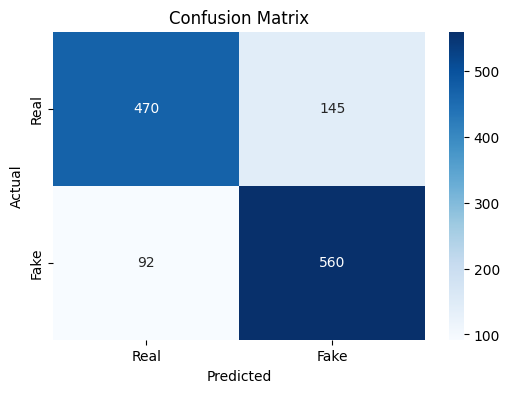

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming X and y are your feature matrix and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Training model using Logistic Regression
logistic_model = LogisticRegression().fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8263614838200474
Precision: 0.8281346174990413
Recall: 0.8263614838200474
F1-Score: 0.8263387684982075
Confusion Matrix:
[[526  89]
 [131 521]]

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.86      0.83       615
        True       0.85      0.80      0.83       652

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



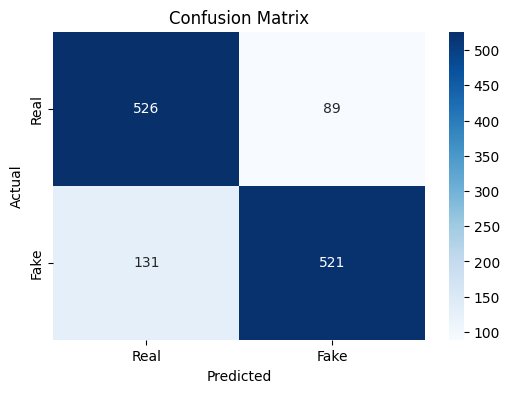

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.svm import SVC

# Training model using Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear').fit(X_train, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.8279400157853196
Precision: 0.8288029380951026
Recall: 0.8279400157853196
F1-Score: 0.8279670273103196
Confusion Matrix:
[[520  95]
 [123 529]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.85      0.83       615
        True       0.85      0.81      0.83       652

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



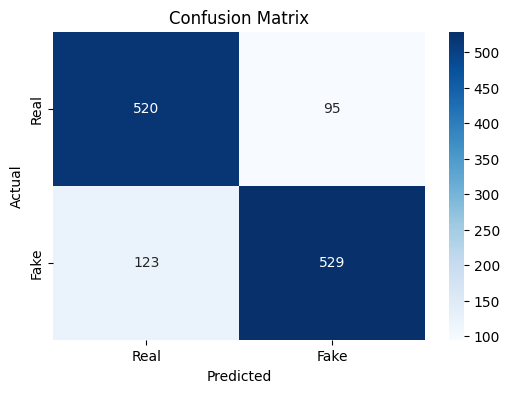

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Training model using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.8287292817679558
Precision: 0.8307468037801078
Recall: 0.8287292817679558
F1-Score: 0.8286908712905688
Confusion Matrix:
[[529  86]
 [131 521]]

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.86      0.83       615
        True       0.86      0.80      0.83       652

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



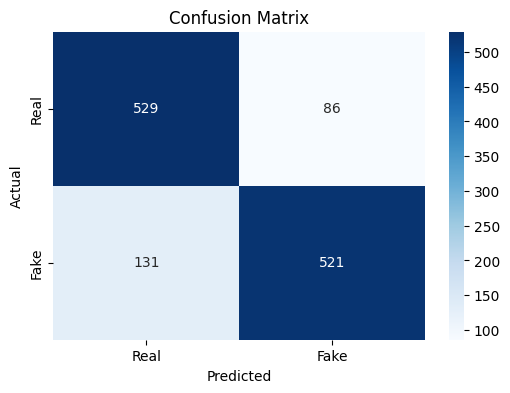

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

USING LSTM Keras

In [14]:
print("Dataset Columns:", messages.columns)

print(messages)

Dataset Columns: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0 

In [15]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [17]:
voc_size=10000

In [18]:
mesg = messages.copy()

In [19]:
import nltk
import re
from nltk.corpus import stopwords

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer     

In [21]:
ps = PorterStemmer()
corpus=[]
for i in range(len(mesg)):
    review = re.sub('[^a-zA-Z]',' ', mesg['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review =' '.join(review)
    corpus.append(review)


#print(review)
print(corpus)


['smell hillari fear', 'watch exact moment paul ryan commit polit suicid trump ralli video', 'kerri go pari gestur sympathi', 'berni support twitter erupt anger dnc tri warn', 'battl new york primari matter', 'tehran usa', 'girl horrifi watch boyfriend left facetim', 'britain schindler die', 'fact check trump clinton command chief forum', 'iran reportedli make new push uranium concess nuclear talk', 'three clinton iowa glimps fire elud hillari clinton campaign', 'donald trump shockingli weak deleg game somehow got even wors', 'strong solar storm tech risk today news oct video', 'way america prepar world war', 'trump take cruz lightli', 'women lead differ', 'shock michel obama hillari caught glamor date rape promot', 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news', 'iran bill obama like', 'chart explain everyth need know partisanship america', 'slipperi slope trump propos ban muslim', 'episod sunday wire hail deplor special guest randi j', 'hilla

In [22]:
onehot_rep=[one_hot(words,voc_size)for words in corpus]
onehot_rep

[[6576, 9732, 8487],
 [9077, 2654, 5774, 7204, 4316, 3150, 8773, 2807, 7926, 8800, 6385],
 [6896, 8622, 9911, 419, 1670],
 [3312, 9462, 4202, 9093, 96, 2894, 1055, 1846],
 [4801, 4490, 7375, 8753, 5875],
 [7586, 2878],
 [7976, 5694, 9077, 8198, 9507, 3633],
 [4340, 8130, 8543],
 [4437, 6161, 7926, 5963, 9860, 7467, 5294],
 [7559, 3570, 1673, 4490, 1119, 9641, 4489, 2392, 5751],
 [9054, 5963, 1562, 4841, 3941, 9940, 9732, 5963, 9268],
 [9422, 7926, 9698, 8934, 6245, 9156, 323, 8444, 5907, 5929],
 [5583, 856, 7877, 9592, 9421, 2402, 7206, 287, 6385],
 [6229, 5358, 8164, 7257, 8079],
 [7926, 8190, 7990, 9097],
 [2535, 3673, 2343],
 [5016, 8932, 9123, 9732, 5057, 4980, 7972, 1152, 210],
 [9732,
  5963,
  4892,
  8601,
  5358,
  6823,
  1750,
  2604,
  4935,
  1713,
  2329,
  5800,
  7206],
 [7559, 6649, 9123, 5765],
 [8387, 7148, 2803, 6162, 8589, 7287, 5358],
 [7805, 8046, 7926, 2362, 5723, 2154],
 [4149, 8055, 3763, 5729, 5516, 9470, 5562, 6383, 2262],
 [9732, 5963, 1673, 3133, 1043, 264

In [23]:
sen_len=20
embed_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sen_len)
print(embed_docs)

[[   0    0    0 ... 6576 9732 8487]
 [   0    0    0 ... 7926 8800 6385]
 [   0    0    0 ... 9911  419 1670]
 ...
 [   0    0    0 ... 3937 3407 3257]
 [   0    0    0 ...  122 2880 2382]
 [   0    0    0 ... 4297 7926 5875]]


In [24]:
len(embed_docs)

6335

In [35]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_shape=(sen_len,)))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


g:\OpenCV_Course\python_env\snow\lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 20, 40)         │       400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,501 (1.74 MB)

 Trainable params: 456,501 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
len(embed_docs),y.shape

(6335, (6335,))

In [37]:
import numpy as np
X_final=np.array(embed_docs)
y_final=np.array(y)

In [38]:
X_final.shape,y_final.shape

((6335, 20), (6335,))

In [39]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [40]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.5680 - loss: 0.6806 - val_accuracy: 0.7642 - val_loss: 0.4967
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8366 - loss: 0.3802 - val_accuracy: 0.7915 - val_loss: 0.4574
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9216 - loss: 0.2226 - val_accuracy: 0.7843 - val_loss: 0.4877
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9397 - loss: 0.1608 - val_accuracy: 0.7776 - val_loss: 0.5851
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9612 - loss: 0.1091 - val_accuracy: 0.7771 - val_loss: 0.6682
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9727 - loss: 0.0773 - val_accuracy: 0.7757 - val_loss: 0.7885
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9795 - loss: 0.0603 - val_accuracy: 0.7681 - val_loss: 0.8605
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9879 - loss: 0.0419 - val_accuracy: 0.7556 - v

In [ ]:
# from tensorflow.keras.layers import Dropout
# ## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_shape=(sen_len,)))
# model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [48]:
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary classes (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
#from sklearn.metrics import confusion_matrix

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# # Printing results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7642276422764228
Precision: 0.7641976872290979
Recall: 0.7642276422764228
F1-Score: 0.7641984991384434
Confusion Matrix:
[[829 242]
 [251 769]]

Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.77      0.77      1071
        True       0.76      0.75      0.76      1020

    accuracy                           0.76      2091
   macro avg       0.76      0.76      0.76      2091
weighted avg       0.76      0.76      0.76      2091



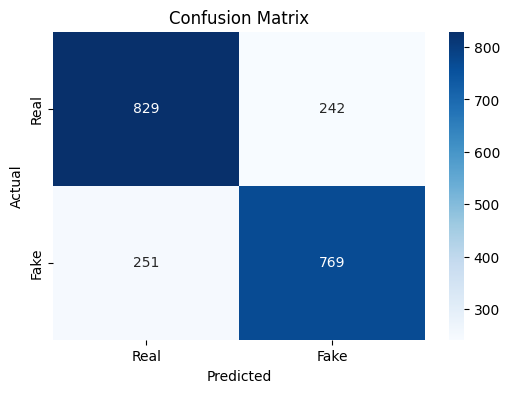

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset, random_split

class LSTMClassifier(nn.Module):
    def __init__(self, voc_size, embedding_dim, hidden_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        last_hidden_state = lstm_out[:, -1, :]
        output = self.fc(last_hidden_state)
        return self.sigmoid(output)

# Hyperparameters
voc_size = 5000        # example vocabulary size
embedding_dim = 40     # embedding vector size
hidden_dim = 100       # LSTM hidden layer size
sent_length = 100      # example input sequence length

model = LSTMClassifier(voc_size, embedding_dim, hidden_dim)
print(model)


LSTMClassifier(
  (embedding): Embedding(5000, 40)
  (lstm): LSTM(40, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [54]:
# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batch processing
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)


In [56]:
# Training parameters
epochs = 5
learning_rate = 0.001

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


AttributeError: partially initialized module 'torch._dynamo' has no attribute 'external_utils' (most likely due to a circular import)

In [ ]:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs).squeeze()
        predicted = (outputs > 0.5).float()  # Apply threshold to get binary predictions
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Print the classification report
print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))
